In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('/home/vlad/code/cobergmann/MA_PREDICTOR/MA_PREDICTOR/data/ma_data_car.csv')
df

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,shares_acquired,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,100.0,Cash|Cash Only,Friendly,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,0.006854
1,1653652020,2005-01-01,NaN,1680.57,Regis Corp,RGS,Scot Lewis Schools,United States,United States,Private,...,100.0,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,54201030,63103010,-0.010266
2,1949421020,2005-01-01,NaN,3301.76,Google Inc,GOOG,PhatBits,United States,United States,Private,...,100.0,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,57201030,57201020,0.007746
3,1652453040,2005-01-01,20.03,371.71,Graco Inc,GGG,Gusmer Europe SL,Spain,United States,Private,...,100.0,Cash|Cash Only,Friendly,Not Applicable,NaN,NaN,NaN,52102010,51101010,-0.011133
4,2721963020,2005-01-01,18220.52,NaN,Exxon Mobil Corp,XOM,Exxon Mobil Corp,United States,United States,Public,...,5.0,Cash|Cash Only,No Applicable,Open Market Purchase|Privately Negotiated Purc...,NaN,NaN,Other,50102030,50102030,-0.003971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,3791733020,2021-08-30,40.00,2830.00,Chart Industries Inc,GTLS,AdEdge Holdings LLC,United States,United States,Private,...,100.0,Cash Only|Cash,Friendly,Not Applicable,NaN,Raymond James,NaN,52102010,59103010,0.020108
27268,3791806020,2021-08-30,NaN,2224.71,Patrick Industries Inc,PATK,Tumacs Boat Covers Inc,United States,United States,Private,...,100.0,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,53203020,53205020,-0.040156
27269,3793728040,2021-08-30,NaN,21061.02,Sysco Corp,SYY,Cegal AS,Norway,United States,Subsidiary,...,100.0,Unspecified,Friendly,Divestiture,NaN,NaN,NaN,54301020,57201010,-0.003545
27270,3792444020,2021-08-31,NaN,5295.10,Financial Institutions Inc,FISI,North Woods Capital Benefits LLC,United States,United States,Private,...,100.0,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,55101010,52203030,-0.025992


In [66]:
df.isna().sum()

id                                0
announcement_date                 0
deal_value                    12921
acquiror_total_assets          1882
acquiror_name                     0
acquiror_ticker                   0
target_name                       0
target_nation                     0
acquiror_nation                   0
target_status                     0
acquiror_industry                 0
target_industry                   0
shares_at_announcement            0
shares_acquired                   0
consideration_offered             0
attitude                          0
acquisition_technique             0
acquiror_financial_advisor    22135
target_financial_advisor      19527
purpose                       12533
acquiror_code                     0
target_code                       0
car                            8813
dtype: int64

In [4]:
df.columns

Index(['id', 'announcement_date', 'deal_value', 'acquiror_total_assets',
       'acquiror_name', 'acquiror_ticker', 'target_name', 'target_nation',
       'acquiror_nation', 'target_status', 'acquiror_industry',
       'target_industry', 'shares_at_announcement', 'shares_acquired',
       'consideration_offered', 'attitude', 'acquisition_technique',
       'acquiror_financial_advisor', 'target_financial_advisor', 'purpose',
       'acquiror_code', 'target_code', 'car'],
      dtype='object')

In [5]:
df['car'].sort_values(ascending=False).head(5)

22338    175999.005217
188       28112.339792
5376       8061.563097
9651       5986.889471
4650       2003.889331
Name: car, dtype: float64

In [6]:
df_drop_outlier = df.drop(index=[22338, 188, 5376, 9651, 4650])
df_drop_outlier

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,shares_acquired,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,100.0,Cash|Cash Only,Friendly,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,0.006854
1,1653652020,2005-01-01,NaN,1680.57,Regis Corp,RGS,Scot Lewis Schools,United States,United States,Private,...,100.0,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,54201030,63103010,-0.010266
2,1949421020,2005-01-01,NaN,3301.76,Google Inc,GOOG,PhatBits,United States,United States,Private,...,100.0,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,57201030,57201020,0.007746
3,1652453040,2005-01-01,20.03,371.71,Graco Inc,GGG,Gusmer Europe SL,Spain,United States,Private,...,100.0,Cash|Cash Only,Friendly,Not Applicable,NaN,NaN,NaN,52102010,51101010,-0.011133
4,2721963020,2005-01-01,18220.52,NaN,Exxon Mobil Corp,XOM,Exxon Mobil Corp,United States,United States,Public,...,5.0,Cash|Cash Only,No Applicable,Open Market Purchase|Privately Negotiated Purc...,NaN,NaN,Other,50102030,50102030,-0.003971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,3791733020,2021-08-30,40.00,2830.00,Chart Industries Inc,GTLS,AdEdge Holdings LLC,United States,United States,Private,...,100.0,Cash Only|Cash,Friendly,Not Applicable,NaN,Raymond James,NaN,52102010,59103010,0.020108
27268,3791806020,2021-08-30,NaN,2224.71,Patrick Industries Inc,PATK,Tumacs Boat Covers Inc,United States,United States,Private,...,100.0,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,53203020,53205020,-0.040156
27269,3793728040,2021-08-30,NaN,21061.02,Sysco Corp,SYY,Cegal AS,Norway,United States,Subsidiary,...,100.0,Unspecified,Friendly,Divestiture,NaN,NaN,NaN,54301020,57201010,-0.003545
27270,3792444020,2021-08-31,NaN,5295.10,Financial Institutions Inc,FISI,North Woods Capital Benefits LLC,United States,United States,Private,...,100.0,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,55101010,52203030,-0.025992


# Data Exploration

## Data seasonality

In [7]:
import datetime as dt

In [8]:
df_drop_outlier['announcement_date'] = pd.to_datetime(df_drop_outlier['announcement_date'])

In [9]:
df_drop_outlier['announcement_date'].dtype

dtype('<M8[ns]')

In [10]:
df_drop_outlier['year'] = df_drop_outlier['announcement_date'].dt.year
df_drop_outlier

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car,year
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,Cash|Cash Only,Friendly,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,0.006854,2005
1,1653652020,2005-01-01,NaN,1680.57,Regis Corp,RGS,Scot Lewis Schools,United States,United States,Private,...,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,54201030,63103010,-0.010266,2005
2,1949421020,2005-01-01,NaN,3301.76,Google Inc,GOOG,PhatBits,United States,United States,Private,...,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,57201030,57201020,0.007746,2005
3,1652453040,2005-01-01,20.03,371.71,Graco Inc,GGG,Gusmer Europe SL,Spain,United States,Private,...,Cash|Cash Only,Friendly,Not Applicable,NaN,NaN,NaN,52102010,51101010,-0.011133,2005
4,2721963020,2005-01-01,18220.52,NaN,Exxon Mobil Corp,XOM,Exxon Mobil Corp,United States,United States,Public,...,Cash|Cash Only,No Applicable,Open Market Purchase|Privately Negotiated Purc...,NaN,NaN,Other,50102030,50102030,-0.003971,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,3791733020,2021-08-30,40.00,2830.00,Chart Industries Inc,GTLS,AdEdge Holdings LLC,United States,United States,Private,...,Cash Only|Cash,Friendly,Not Applicable,NaN,Raymond James,NaN,52102010,59103010,0.020108,2021
27268,3791806020,2021-08-30,NaN,2224.71,Patrick Industries Inc,PATK,Tumacs Boat Covers Inc,United States,United States,Private,...,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,53203020,53205020,-0.040156,2021
27269,3793728040,2021-08-30,NaN,21061.02,Sysco Corp,SYY,Cegal AS,Norway,United States,Subsidiary,...,Unspecified,Friendly,Divestiture,NaN,NaN,NaN,54301020,57201010,-0.003545,2021
27270,3792444020,2021-08-31,NaN,5295.10,Financial Institutions Inc,FISI,North Woods Capital Benefits LLC,United States,United States,Private,...,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,55101010,52203030,-0.025992,2021


<AxesSubplot:xlabel='year'>

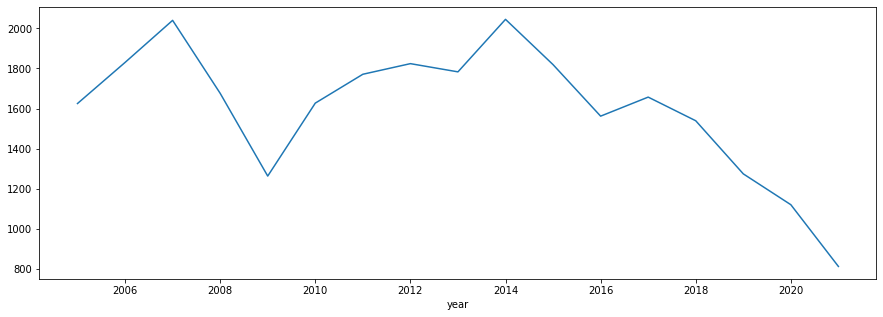

In [11]:
plt.figure(figsize=(15, 5))
df_drop_outlier.groupby('year')['id'].count().plot()

<AxesSubplot:xlabel='year'>

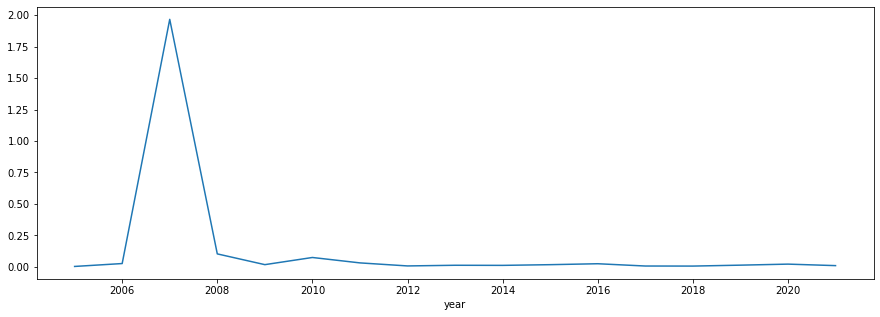

In [12]:
plt.figure(figsize=(15, 5))
df_drop_outlier.groupby('year')['car'].mean().plot()

In [13]:
df_drop_outlier['month'] = df_drop_outlier['announcement_date'].dt.month
df_drop_outlier.head()

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car,year,month
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,Friendly,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,0.006854,2005,1
1,1653652020,2005-01-01,NaN,1680.57,Regis Corp,RGS,Scot Lewis Schools,United States,United States,Private,...,Friendly,Not Applicable,NaN,NaN,NaN,54201030,63103010,-0.010266,2005,1
2,1949421020,2005-01-01,NaN,3301.76,Google Inc,GOOG,PhatBits,United States,United States,Private,...,Friendly,Not Applicable,NaN,NaN,NaN,57201030,57201020,0.007746,2005,1
3,1652453040,2005-01-01,20.03,371.71,Graco Inc,GGG,Gusmer Europe SL,Spain,United States,Private,...,Friendly,Not Applicable,NaN,NaN,NaN,52102010,51101010,-0.011133,2005,1
4,2721963020,2005-01-01,18220.52,NaN,Exxon Mobil Corp,XOM,Exxon Mobil Corp,United States,United States,Public,...,No Applicable,Open Market Purchase|Privately Negotiated Purc...,NaN,NaN,Other,50102030,50102030,-0.003971,2005,1


In [14]:
df_drop_outlier.groupby('month')['id'].count()

month
1     3104
2     2391
3     2197
4     2206
5     2195
6     2260
7     2389
8     2063
9     2068
10    2195
11    1862
12    2337
Name: id, dtype: int64

<AxesSubplot:xlabel='month'>

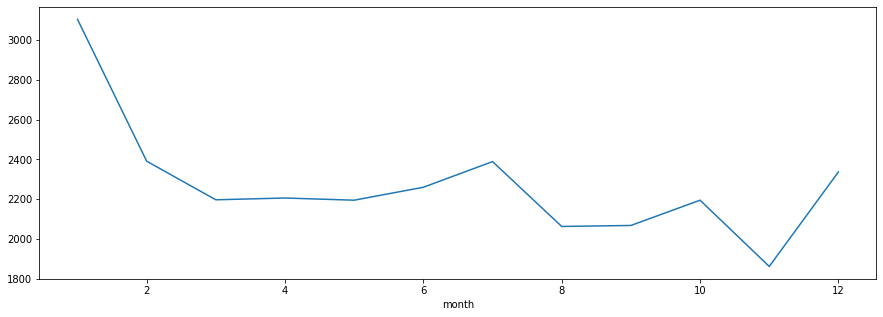

In [15]:
plt.figure(figsize=(15, 5))
df_drop_outlier.groupby('month')['id'].count().plot()

<AxesSubplot:xlabel='month'>

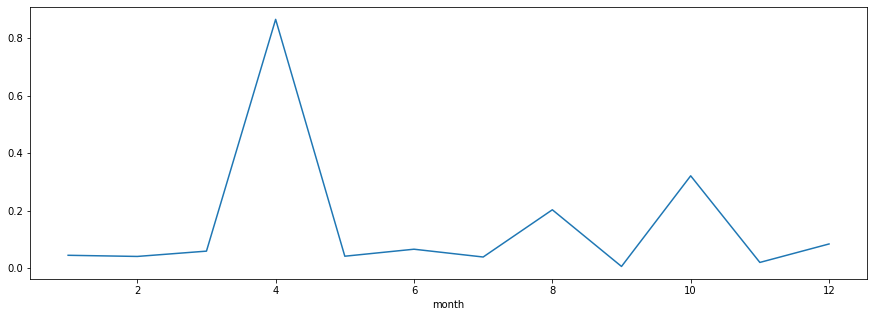

In [16]:
plt.figure(figsize=(15, 5))
df_drop_outlier.groupby('month')['car'].mean().plot()

## Details on merges

Looking at companies that performed an internal merger  

In [43]:
# Filtering the dataset to see how many companies perfermormed an internal merger

df_filter = df.loc[df['acquiror_name'] == df['target_name']]
df_filter

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,shares_acquired,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car
4,2721963020,2005-01-01,18220.52,NaN,Exxon Mobil Corp,XOM,Exxon Mobil Corp,United States,United States,Public,...,5.00,Cash|Cash Only,No Applicable,Open Market Purchase|Privately Negotiated Purc...,NaN,NaN,Other,50102030,50102030,-0.003971
69,1634142020,2005-01-20,281.40,NaN,ONEOK Inc,OKE,ONEOK Inc,United States,United States,Public,...,7.25,Cash Only|Cash,No Applicable,Privately Negotiated Purchase|Repurchase,NaN,NaN,Increase shareholder value/dilute number of ou...,59102010,59102010,0.039864
137,1637144020,2005-03-02,NaN,NaN,Bridgetech Holdings International Inc,BGTH,Bridgetech Holdings International Inc,United States,United States,Private,...,100.00,Common Stock,Friendly,Reverse Takeover|Stock Swap,NaN,NaN,NaN,55101030,56101010,NaN
142,1637494020,2005-07-02,145.00,NaN,Varian Inc,VARI,Varian Inc,United States,United States,Public,...,5.05,Cash Only|Cash,No Applicable,Open Market Purchase|Repurchase|Privately Nego...,NaN,NaN,Increase shareholder value,57105010,57105010,NaN
155,1638136020,2005-08-02,655.00,NaN,Nu Skin Enterprises Inc,NUS,Nu Skin Enterprises Inc,United States,United States,Public,...,41.56,Cash|Cash|Cash|Cash|Cash|Cash,No Applicable,Open Market Purchase|Privately Negotiated Purc...,NaN,NaN,Increase shareholder value,54201020,54201020,-0.043444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26527,3701990020,2021-01-14,5.00,NaN,Codorus Valley Bancorp Inc,CVLY,Codorus Valley Bancorp Inc,United States,United States,Public,...,1.46,Cash Only|Cash,No Applicable,Repurchase|Open Market Purchase,NaN,NaN,Other,55101010,55101010,0.007048
26677,3702657020,2021-02-24,2000.00,NaN,Domino's Pizza Inc,DPZ,Domino's Pizza Inc,United States,United States,Public,...,5.80,Cash|Cash,No Applicable,Repurchase|Privately Negotiated Purchase|Open ...,NaN,NaN,Other,53301020,53301020,-0.059853
26774,3721132020,2021-03-29,189.40,48.84,Tempest Therapeutics Inc,TPST,Tempest Therapeutics Inc,United States,United States,Private,...,100.00,Common Stock,Friendly,Reverse Takeover|Stock Swap,SVB Leerink LLC,Piper Sandler & Co,NaN,56202010,56202010,-0.474463
26794,3738710020,2021-01-04,75.00,NaN,"Cathay General Bancorp,Los Angeles,California",CATY,"Cathay General Bancorp,Los Angeles,California",United States,United States,Public,...,2.31,Cash|Cash Only,No Applicable,Repurchase|Open Market Purchase,NaN,NaN,Other,55101010,55101010,0.008961


In [44]:
df_filter.columns

Index(['id', 'announcement_date', 'deal_value', 'acquiror_total_assets',
       'acquiror_name', 'acquiror_ticker', 'target_name', 'target_nation',
       'acquiror_nation', 'target_status', 'acquiror_industry',
       'target_industry', 'shares_at_announcement', 'shares_acquired',
       'consideration_offered', 'attitude', 'acquisition_technique',
       'acquiror_financial_advisor', 'target_financial_advisor', 'purpose',
       'acquiror_code', 'target_code', 'car'],
      dtype='object')

Select the columns that we want to perform further analysis

In [45]:
# Filtering the columns down to what we want to 

df_filter_reduced = df_filter[['shares_acquired', 'target_status', 'target_nation', 'consideration_offered', 'attitude', 'purpose', 'car', 'acquisition_technique', 'acquiror_total_assets', 'shares_acquired']].sort_values(by='car',ascending=False)
df_filter_reduced

,shares_acquired,target_status,target_nation,consideration_offered,attitude,purpose,car,acquisition_technique,acquiror_total_assets,shares_acquired
22338,6.78,Public,United States,Cash|Cash Only,No Applicable,Other,175999.005217,Self Tender|Tender Offer,NaN,6.78
454,100.00,Private,United States,Restricted Common,Friendly,Increase shareholder value,1.781267,Stock Swap,NaN,100.00
20542,100.00,Private,United States,Unspecified,Friendly,NaN,1.364425,Not Applicable,0.71,100.00
3375,100.00,Private,United States,Unspecified,Friendly,General strategy to take advantage of sound in...,0.810130,Reverse Takeover|Stock Swap,0.82,100.00
19743,100.00,Private,United States,Common Stock,Friendly,NaN,0.669412,Reverse Takeover|Stock Swap,52.97,100.00
...,...,...,...,...,...,...,...,...,...,...
23942,4.97,Public,United States,Cash Only|Cash,No Applicable,Other,NaN,Open Market Purchase|Repurchase,NaN,4.97
24057,34.72,Public,United States,Cash|Cash Only,No Applicable,Other,NaN,Privately Negotiated Purchase|Repurchase,NaN,34.72
24085,27.65,Public,United States,Cash|Cash Only,No Applicable,Other,NaN,Privately Negotiated Purchase|Repurchase,NaN,27.65
25455,100.00,Private,United States,Stock,Friendly,NaN,NaN,Stock Swap|Financial Acquiror,NaN,100.00


In [55]:
# Check for NaN

df_filter_reduced.isna().sum()

shares_acquired            0
target_status              0
target_nation              0
consideration_offered      0
attitude                   0
purpose                  152
car                      212
acquisition_technique      0
acquiror_total_assets    630
shares_acquired            0
dtype: int64

Looking at the CAR values in the self mergers

In [61]:
df_filter_reduced['car'].sort_values(ascending=False).head(25)

22338    175999.005217
454           1.781267
20542         1.364425
3375          0.810130
19743         0.669412
1186          0.272570
12051         0.222285
22697         0.211783
21132         0.197389
6920          0.171074
1507          0.159751
12172         0.157269
15106         0.154071
25443         0.153495
24089         0.148473
19243         0.147633
18998         0.129128
24595         0.128197
19556         0.122143
7428          0.121332
23639         0.115400
19557         0.107033
19534         0.104798
17418         0.103188
9853          0.099949
Name: car, dtype: float64

Target nation

In [56]:
df_filter_reduced['target_nation'].value_counts()

United States    649
Canada             1
Name: target_nation, dtype: int64

In [22]:
df_filter_reduced.loc[df_filter_reduced['target_nation'] == 'Canada']

,shares_acquired,target_status,target_nation,consideration_offered,attitude,purpose,car
13787,100.0,Public,Canada,Common Stock,Friendly,Other,NaN


In [23]:
df.loc[13787 : 13787]

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,shares_acquired,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car
13787,2491244040,2013-01-22,12.99,NaN,Prairie West Oil & Gas Ltd,KTRC,Prairie West Oil & Gas Ltd,Canada,United States,Public,...,100.0,Common Stock,Friendly,Stock Swap,NaN,NaN,Other,53205020,50102020,NaN


In [24]:
df_filter_reduced['attitude'].value_counts()

No Applicable    612
Friendly          35
Neutral            3
Name: attitude, dtype: int64

In [25]:
df_filter_reduced['consideration_offered'].value_counts()

Cash Only|Cash                    275
Cash|Cash Only                    266
Common Stock                       33
Cash|Cash                          31
Unspecified                        20
Cash|Cash|Cash                      7
Cash|Cash|Cash|Cash                 2
Cash|Cash|Cash|Cash|Cash|Cash       2
Common Stock|Common Stock           2
Third Party Common Shares           1
Restricted Common                   1
Promissory Note                     1
Common Stock Type B                 1
Cash|Common Stock                   1
Not Applicable                      1
Cash|Cash|Cash|Cash|Cash            1
Common Stock Type A                 1
Third Party Common Shares|Cash      1
Earnout|Cash                        1
American Depositary Share|Cash      1
Stock                               1
Name: consideration_offered, dtype: int64

In [26]:
((df_filter_reduced['consideration_offered'].value_counts() / len(df_filter_reduced)) * 100).nlargest(n=10, keep='first')

Cash Only|Cash                   42.307692
Cash|Cash Only                   40.923077
Common Stock                      5.076923
Cash|Cash                         4.769231
Unspecified                       3.076923
Cash|Cash|Cash                    1.076923
Cash|Cash|Cash|Cash               0.307692
Cash|Cash|Cash|Cash|Cash|Cash     0.307692
Common Stock|Common Stock         0.307692
Third Party Common Shares         0.153846
Name: consideration_offered, dtype: float64

In [27]:
df_filter_purpose = pd.DataFrame(df_filter_reduced['purpose'].value_counts())
df_filter_purpose_index = df_filter_purpose.reset_index()
df_filter_purpose_index.rename(columns={'index':'Purpose', 'purpose': 'Count'}, inplace=True)
df_filter_purpose_index

,Purpose,Count
0,Other,282
1,Increase shareholder value,185
2,Increase shareholder value/dilute number of ou...,6
3,General strategy to take advantage of sound in...,3
4,Offset dilution caused by exercising of options,3
5,Purchase shares for ESOP,2
6,Increase shareholder value|General strategy to...,1
7,Proceeds used to pay down existing outstanding...,1
8,General restructuring of business/operations,1
9,Proceeds used to pay down existing outstanding...,1
